# **MOUNT GOOGLE DRIVE**
In Google Colab, we can mount Google Drive, allowing access to files located under /content/drive/MyDrive/.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT PACKAGES**
Here we import all the packages that are necessary to compute.

In [1]:
import pandas as pd
import numpy as np
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
!pip install annoy
from annoy import AnnoyIndex


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

# **IMPORT DATASET**
Here we import dataset from Google Drive

In [3]:
df=pd.read_csv("/content/drive/MyDrive/DBDA Project/movies_scraping.csv")

# **DATA VISUALIZATION**
Below shown is the visualization of imported dataset.It basically has 20 columns and 722317 rows (ie. id, title, genres, original_language , production_company, credits, etc)

In [4]:
df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722312,836042,Tomcat Tales,Documentary-History-War,en,Learn from real-life Top Guns who have flown a...,0.001,NaN,2020-01-01,0.0,0.000000e+00,120.0,Released,NaN,0.000,0.0,NaN,NaN,/8mkAUkkRCLvMBMBvLFvhLF9SPC4.jpg,NaN,NaN
722313,527223,Strictly Modern,Comedy-Romance,en,Strictly Modern is a 1930 American pre-Code co...,0.001,First National Pictures-Warner Bros. Entertain...,1930-03-02,0.0,0.000000e+00,63.0,Released,Dorothy MACKAILL -THE WOMAN who thought she kn...,0.000,0.0,Dorothy Mackaill-Sidney Blackmer-Julanne Johns...,lost film,/qr4dU5DOhOJ3YTBdpdXpG6AUOyZ.jpg,NaN,NaN
722314,717787,Your Letter,Animation-Drama-Mystery-Adventure,ko,Sori Lee is hoping for a fresh start at her ne...,0.001,Studio N,2024-09-27,0.0,0.000000e+00,97.0,Released,NaN,0.000,0.0,Lee Soo-hyun-Kim Min-ju-Min Seungwoo-Nam Doh-h...,bullying-slice of life-school life,NaN,/thsAU92Ei2Nbm38ZdkvHI8xLaSc.jpg,NaN
722315,718477,Café Tacvba - Un Viaje,NaN,en,Un Viaje is the first live album by the rock b...,0.001,NaN,2005-04-19,0.0,0.000000e+00,120.0,Released,NaN,0.000,0.0,Rubén Albarrán-Emmanuel del Real-Joselo Rangel...,NaN,/95HgsWBDuSJBgcq0Fkv4JYZeTdR.jpg,/laiCThOhK5LKJJsMSXSzoePv8uX.jpg,NaN


In [5]:
df.shape

(722317, 20)

In [6]:
# This will return a count of null (NaN) values for each column in our DataFrame

df.isnull().sum().sort_values(ascending=False)

,0
recommendations,686301
tagline,613841
keywords,511678
backdrop_path,499106
production_companies,384926
credits,224714
genres,210317
poster_path,184493
overview,118243
release_date,51549


In [7]:
# This code is used to get a summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722317 entries, 0 to 722316
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722317 non-null  int64  
 1   title                 722311 non-null  object 
 2   genres                512000 non-null  object 
 3   original_language     722317 non-null  object 
 4   overview              604074 non-null  object 
 5   popularity            722317 non-null  float64
 6   production_companies  337391 non-null  object 
 7   release_date          670768 non-null  object 
 8   budget                722317 non-null  float64
 9   revenue               722317 non-null  float64
 10  runtime               687982 non-null  float64
 11  status                722317 non-null  object 
 12  tagline               108476 non-null  object 
 13  vote_average          722317 non-null  float64
 14  vote_count            722317 non-null  float64
 15  

In [8]:
# This code calculates and sorts the percentage of missing values in each column of a DataFrame.

null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
recommendations,95.013824
tagline,84.982217
keywords,70.838427
backdrop_path,69.097917
production_companies,53.290453
credits,31.110164
genres,29.116994
poster_path,25.541833
overview,16.369959
release_date,7.136617


**This code effectively visualizes the top 6 most popular movies based on the popularity column from the dataset.**

Text(0.5, 1.0, 'Popular Movies')

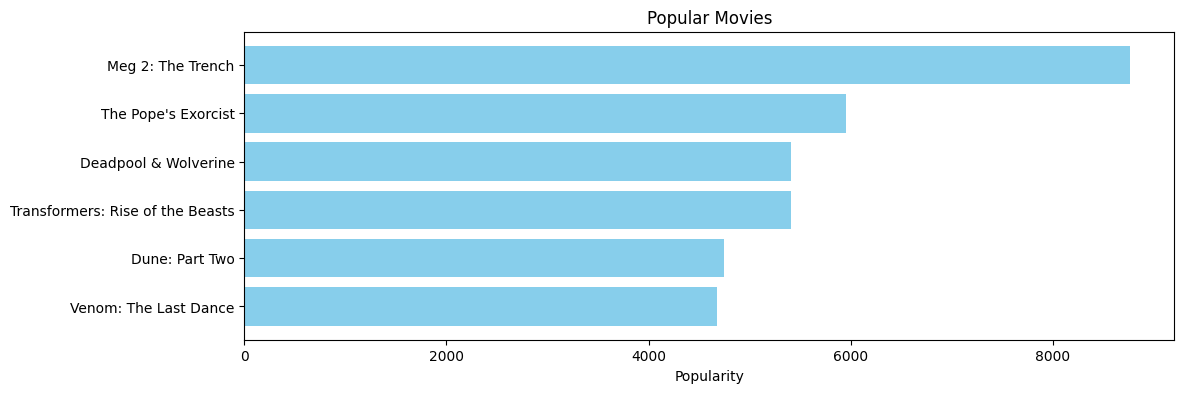

In [9]:
# Bar graph, Popularity vs Title
pop= df.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# **WEB SCRAPING**

In [ ]:
df.drop(['production_companies', 'poster_path', 'backdrop_path', 'recommendations', 'status','vote_average', 'vote_count', 'release_date', 'runtime', 'original_language', 'tagline', 'popularity', 'budget', 'revenue'], axis=1, inplace=True)

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
recommendations,95.013824
tagline,84.982217
keywords,70.838427
backdrop_path,69.097917
production_companies,53.290453
credits,31.110164
genres,29.116994
poster_path,25.541833
overview,16.369959
release_date,7.136617


In [ ]:
df = df[df[["id", "title", "genres", "overview", "keywords", "credits"]].isnull().any(axis=1)]
print(df.shape)

(558757, 6)


**Scraping Genres, Keywords, Credits, Overview (NOT WORKING)**

In [ ]:
# import pandas as pd
# import requests
# import time
# import urllib.parse
# from bs4 import BeautifulSoup

# # Load dataset
# csv_path = "/content/drive/MyDrive/DBDA Project/movies.csv"
# df = pd.read_csv(csv_path)

# # Ensure required columns exist
# for col in ["genres", "keywords", "credits", "overview"]:
#     if col not in df.columns:
#         df[col] = None

# # Filter the dataset to include only rows with missing details
# df_metadata = df[df[["genres", "overview", "keywords", "credits"]].isnull().any(axis=1)]

# # Use a session to improve request efficiency
# session = requests.Session()
# session.headers.update({"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"})

# # TMDb API key (replace with your actual API key)
# API_KEY = "2c6f988322cddd198aaa90265c4f0160"

# # Function to fetch movie details from TMDb
# def get_movie_details_tmdb(movie_name):
#     search_url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={urllib.parse.quote(movie_name)}"

#     try:
#         search_response = session.get(search_url)
#         if search_response.status_code != 200:
#             return None

#         search_data = search_response.json()
#         if not search_data["results"]:
#             return None

#         movie_id = search_data["results"][0]["id"]
#         movie_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}"

#         movie_response = session.get(movie_url)
#         if movie_response.status_code != 200:
#             return None

#         movie_data = movie_response.json()
#         details = {}

#         # Extract genres
#         genres = movie_data.get("genres", [])
#         details["genres"] = "-".join([genre["name"] for genre in genres]) if genres else None

#         # Extract keywords
#         keywords_url = f"https://api.themoviedb.org/3/movie/{movie_id}/keywords?api_key={API_KEY}"
#         keywords_response = session.get(keywords_url)
#         if keywords_response.status_code == 200:
#             keywords_data = keywords_response.json()
#             details["keywords"] = "-".join([kw["name"] for kw in keywords_data.get("keywords", [])]) if keywords_data.get("keywords") else None

#         # Extract credits (Top 5 cast members)
#         credits_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_KEY}"
#         credits_response = session.get(credits_url)
#         if credits_response.status_code == 200:
#             credits_data = credits_response.json()
#             details["credits"] = "-".join([cast["name"] for cast in credits_data.get("cast", [])[:5]]) if credits_data.get("cast") else None

#         # Extract overview
#         details["overview"] = movie_data.get("overview") if movie_data.get("overview") else None

#         return details
#     except Exception as e:
#         print(f"TMDb Error for {movie_name}: {e}")
#         return None

# # Function to fetch movie details from IMDb if TMDb fails
# def get_movie_details_imdb(movie_name):
#     search_url = f"https://www.imdb.com/find?q={urllib.parse.quote(movie_name)}&s=tt"

#     try:
#         search_response = session.get(search_url)
#         if search_response.status_code != 200:
#             return None

#         search_soup = BeautifulSoup(search_response.text, "html.parser")
#         first_result = search_soup.select_one("td.result_text a")
#         if not first_result:
#             return None

#         movie_url = "https://www.imdb.com" + first_result["href"]
#         movie_response = session.get(movie_url)
#         if movie_response.status_code != 200:
#             return None

#         movie_soup = BeautifulSoup(movie_response.text, "html.parser")
#         details = {}

#         # Extract genres
#         genre_tags = movie_soup.select(".ipc-chip-list__scroller a")
#         details["genres"] = "-".join([genre.text.strip() for genre in genre_tags]) if genre_tags else None

#         # Extract cast (Top 5 actors)
#         cast_tags = movie_soup.select(".sc-bfec09a1-5 a")
#         details["credits"] = "-".join([cast.text.strip() for cast in cast_tags[:5]]) if cast_tags else None

#         # Extract overview
#         overview_tag = movie_soup.select_one(".sc-16ede01-2 b")
#         details["overview"] = overview_tag.text.strip() if overview_tag else None

#         # IMDb does not provide direct keywords, so leave it as None
#         details["keywords"] = None

#         return details
#     except Exception as e:
#         print(f"IMDb Error for {movie_name}: {e}")
#         return None

# # Iterate over movies with missing details and fetch missing information
# batch_size = 50  # Save after every 50 updates
# updated_count = 0
# total_count = len(df_metadata)  # Total number of movies to process

# for index, row in df_metadata.iterrows():
#     movie_name = row["title"]
#     print(f"🔍 Fetching details for: {movie_name}")

#     details = get_movie_details_tmdb(movie_name)
#     if not details:
#         print(f"⚠️ TMDb failed, trying IMDb for {movie_name}")
#         details = get_movie_details_imdb(movie_name)

#     if details:
#         updated = False
#         # Check and update each column only if missing
#         for col in ["genres", "keywords", "credits", "overview"]:
#             if pd.isna(row[col]) or row[col] in [None, "", "nan"]:  # Check for empty values
#                 if details.get(col):
#                     df.at[index, col] = details[col]
#                     print(f"✅ Updated {col} for: {movie_name} -> {details[col]}")
#                     updated = True
#                 else:
#                     print(f"❌ No data for {col} for: {movie_name}")

#         if updated:
#             updated_count += 1

#     # Save dataset in batches to reduce file operations
#     if updated_count % batch_size == 0 and updated_count > 0:
#         df.to_csv(csv_path, index=False)
#         print(f"💾 Saved after {updated_count} updates.")

#     # Display progress
#     progress = (updated_count / total_count) * 100
#     print(f"Progress: {updated_count}/{total_count} ({progress:.2f}%)")

#     # Pause to avoid getting blocked
#     time.sleep(2)

# # Final save
# df.to_csv("/content/drive/MyDrive/DBDA Project/movies_scraping.csv", index=False)
# print("🎬✅ Movie details updated in movies.csv")


🔍 Fetching details for: The Eighth Clause
❌ No data for keywords for: The Eighth Clause
Progress: 0/558757 (0.00%)
🔍 Fetching details for: Lord of the Streets
❌ No data for keywords for: Lord of the Streets
Progress: 0/558757 (0.00%)
🔍 Fetching details for: Padre no hay más que uno 3
✅ Updated keywords for: Padre no hay más que uno 3 -> holiday-christmas party-big family
Progress: 1/558757 (0.00%)
🔍 Fetching details for: The Nights Belong to Monsters
❌ No data for keywords for: The Nights Belong to Monsters
Progress: 1/558757 (0.00%)
🔍 Fetching details for: Bar Fight
❌ No data for keywords for: Bar Fight
Progress: 1/558757 (0.00%)
🔍 Fetching details for: Alien Sniperess
❌ No data for keywords for: Alien Sniperess
Progress: 1/558757 (0.00%)
🔍 Fetching details for: Dark Blood
✅ Updated keywords for: Dark Blood -> anime-horror
Progress: 2/558757 (0.00%)
🔍 Fetching details for: Patriots Time
❌ No data for keywords for: Patriots Time
Progress: 2/558757 (0.00%)
🔍 Fetching details for: Candy 

KeyboardInterrupt: 

**Scraping Genres**

In [11]:
import pandas as pd
import requests
import time
import urllib.parse

# Load dataset
csv_path = "/content/drive/MyDrive/DBDA Project/movies_scraping.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
if "genres" not in df.columns:
    df["genres"] = None

# Skip movies that have already been processed (even if no genres were found)
df_metadata = df[df["genres"].isnull()]

# Use a session to improve request efficiency
session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"})

# TMDb API key (replace with your actual API key)
API_KEY = "2c6f988322cddd198aaa90265c4f0160"

# Function to fetch movie genres from TMDb
def get_movie_genres_tmdb(movie_name):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={urllib.parse.quote(movie_name)}"

    try:
        search_response = session.get(search_url)
        if search_response.status_code != 200:
            return None

        search_data = search_response.json()
        if not search_data["results"]:
            return "Not Found"  # Mark as processed but not found

        movie_id = search_data["results"][0]["id"]
        movie_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}"

        movie_response = session.get(movie_url)
        if movie_response.status_code != 200:
            return None

        movie_data = movie_response.json()
        genres = movie_data.get("genres", [])
        return "-".join([genre["name"] for genre in genres]) if genres else "Not Found"

    except Exception as e:
        print(f"TMDb Error for {movie_name}: {e}")
        return None

# Iterate over movies with missing genres and fetch genres from TMDb
batch_size = 50  # Save after every 50 updates
updated_count = 0
total_count = len(df_metadata)  # Total number of movies to process

for index, row in df_metadata.iterrows():
    movie_name = row["title"]

    # Skip if genre is already marked as "Not Found"
    if pd.notna(df.at[index, "genres"]) and df.at[index, "genres"] == "Not Found":
        continue

    print(f"🔍 Fetching genres for: {movie_name}")

    genres = get_movie_genres_tmdb(movie_name)
    if genres:
        df.at[index, "genres"] = genres
        print(f"✅ Updated genres for: {movie_name} -> {genres}")
        updated_count += 1
    else:
        print(f"❌ No genres found for: {movie_name}")

    # Save dataset in batches
    if updated_count % batch_size == 0 and updated_count > 0:
        df.to_csv(csv_path, index=False)
        print(f"💾 Saved after {updated_count} updates.")

    # Display progress
    progress = (updated_count / total_count) * 100
    print(f"Progress: {updated_count}/{total_count} ({progress:.2f}%)")

    # Pause to avoid getting blocked
    time.sleep(2)

# Final save
df.to_csv("/content/drive/MyDrive/DBDA Project/movies_scraping.csv", index=False)
print("🎬✅ Genres updated in movies_scraping.csv")


🔍 Fetching genres for: Bidrohi - The Rebel
✅ Updated genres for: Bidrohi - The Rebel -> Not Found
Progress: 1/210267 (0.00%)
🔍 Fetching genres for: Star Wars: Wrath of the Mandalorian
✅ Updated genres for: Star Wars: Wrath of the Mandalorian -> Not Found
Progress: 2/210267 (0.00%)
🔍 Fetching genres for: XXX
✅ Updated genres for: XXX -> Action-Adventure-Thriller-Crime
Progress: 3/210267 (0.00%)
🔍 Fetching genres for: Double Rope Torture
✅ Updated genres for: Double Rope Torture -> Drama
Progress: 4/210267 (0.00%)
🔍 Fetching genres for: Return of Chucky
✅ Updated genres for: Return of Chucky -> Horror-Thriller
Progress: 5/210267 (0.00%)
🔍 Fetching genres for: Doctor Strange: A Strange Transformation
✅ Updated genres for: Doctor Strange: A Strange Transformation -> Not Found
Progress: 6/210267 (0.00%)
🔍 Fetching genres for: Mission Everest
✅ Updated genres for: Mission Everest -> Not Found
Progress: 7/210267 (0.00%)
🔍 Fetching genres for: Strange Things Happen at Sundown
✅ Updated genres 

KeyboardInterrupt: 

**Scraping Overview**

In [ ]:
import pandas as pd
import requests
import time
import urllib.parse

# Load dataset
csv_path = "/content/drive/MyDrive/DBDA Project/movies.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
if "overview" not in df.columns:
    df["overview"] = None

# Filter the dataset to include only rows with missing overview
df_metadata = df[df["overview"].isnull()]

# Use a session to improve request efficiency
session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"})

# TMDb API key (replace with your actual API key)
API_KEY = "2c6f988322cddd198aaa90265c4f0160"

# Function to fetch movie overview from TMDb
def get_movie_overview_tmdb(movie_name):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={urllib.parse.quote(movie_name)}"

    try:
        search_response = session.get(search_url)
        if search_response.status_code != 200:
            print(f"Error fetching data for {movie_name}, Status Code: {search_response.status_code}")
            return None

        search_data = search_response.json()
        if not search_data["results"]:
            print(f"No results found for {movie_name}")
            return None

        movie_id = search_data["results"][0]["id"]
        movie_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}"

        movie_response = session.get(movie_url)
        if movie_response.status_code != 200:
            print(f"Error fetching movie details for {movie_name}, Status Code: {movie_response.status_code}")
            return None

        movie_data = movie_response.json()

        # Extract overview
        return movie_data.get("overview") if movie_data.get("overview") else None

    except Exception as e:
        print(f"TMDb Error for {movie_name}: {e}")
        return None

# Iterate over movies with missing overviews and fetch overviews from TMDb
batch_size = 50  # Save after every 50 updates
updated_count = 0
total_count = len(df_metadata)  # Total number of movies to process

for index, row in df_metadata.iterrows():
    movie_name = row["title"]
    print(f"🔍 Fetching overview for: {movie_name}")

    overview = get_movie_overview_tmdb(movie_name)
    if overview:
        df.at[index, "overview"] = overview
        print(f"✅ Updated overview for: {movie_name} -> {overview[:100]}...")  # Print first 100 characters of overview
        updated_count += 1
    else:
        print(f"❌ No overview found for: {movie_name}")

    # Save dataset in batches to reduce file operations
    if updated_count % batch_size == 0 and updated_count > 0:
        df.to_csv(csv_path, index=False)
        print(f"💾 Saved after {updated_count} updates.")

    # Display progress
    progress = (updated_count / total_count) * 100
    print(f"Progress: {updated_count}/{total_count} ({progress:.2f}%)")

    # Pause to avoid getting blocked
    time.sleep(2)

# Final save
df.to_csv("/content/drive/MyDrive/DBDA Project/movies_scraping.csv", index=False)
print("🎬✅ Overviews updated in movies.csv")


🔍 Fetching overview for: La novia de América
✅ Updated overview for: La novia de América -> Ana, a young Spanish woman who has just been dumped by her boyfriend, and her brother Tono, receive ...
Progress: 1/118243 (0.00%)
🔍 Fetching overview for: 人妻性奴隶：美人妻调教日记
No results found for 人妻性奴隶：美人妻调教日记
❌ No overview found for: 人妻性奴隶：美人妻调教日记
Progress: 1/118243 (0.00%)
🔍 Fetching overview for: Toscana
✅ Updated overview for: Toscana -> When a Danish chef travels to Tuscany to sell his father's business, he meets a local woman who insp...
Progress: 2/118243 (0.00%)
🔍 Fetching overview for: Ninja Escapades: Creation of Akatsuki, The Two Uchiha, The Far Reaches of Hope
No results found for Ninja Escapades: Creation of Akatsuki, The Two Uchiha, The Far Reaches of Hope
❌ No overview found for: Ninja Escapades: Creation of Akatsuki, The Two Uchiha, The Far Reaches of Hope
Progress: 2/118243 (0.00%)
🔍 Fetching overview for: Garota da Moto
❌ No overview found for: Garota da Moto
Progress: 2/118243 (0.0

KeyboardInterrupt: 

**Scraping Credits**

In [ ]:
import pandas as pd
import requests
import time
import urllib.parse

# Load dataset
csv_path = "/content/drive/MyDrive/DBDA Project/movies.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
if "credits" not in df.columns:
    df["credits"] = None

# Filter the dataset to include only rows with missing credits
df_metadata = df[df["credits"].isnull()]

# Use a session to improve request efficiency
session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"})

# TMDb API key (replace with your actual API key)
API_KEY = "2c6f988322cddd198aaa90265c4f0160"

# Function to fetch movie credits (cast) from TMDb
def get_movie_credits_tmdb(movie_name):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={urllib.parse.quote(movie_name)}"

    try:
        search_response = session.get(search_url)
        if search_response.status_code != 200:
            return None

        search_data = search_response.json()
        if not search_data["results"]:
            return None

        movie_id = search_data["results"][0]["id"]
        credits_url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={API_KEY}"

        credits_response = session.get(credits_url)
        if credits_response.status_code != 200:
            return None

        credits_data = credits_response.json()

        # Extract top 5 cast members
        cast = credits_data.get("cast", [])[:5]
        return "-".join([cast_member["name"] for cast_member in cast]) if cast else None

    except Exception as e:
        print(f"TMDb Error for {movie_name}: {e}")
        return None

# Iterate over movies with missing credits and fetch credits from TMDb
batch_size = 50  # Save after every 50 updates
updated_count = 0
total_count = len(df_metadata)  # Total number of movies to process

for index, row in df_metadata.iterrows():
    movie_name = row["title"]
    print(f"🔍 Fetching credits for: {movie_name}")

    credits = get_movie_credits_tmdb(movie_name)
    if credits:
        df.at[index, "credits"] = credits
        print(f"✅ Updated credits for: {movie_name} -> {credits}")
        updated_count += 1
    else:
        print(f"❌ No credits found for: {movie_name}")

    # Save dataset in batches to reduce file operations
    if updated_count % batch_size == 0 and updated_count > 0:
        df.to_csv(csv_path, index=False)
        print(f"💾 Saved after {updated_count} updates.")

    # Display progress
    progress = (updated_count / total_count) * 100
    print(f"Progress: {updated_count}/{total_count} ({progress:.2f}%)")

    # Pause to avoid getting blocked
    time.sleep(2)

# Final save
df.to_csv("/content/drive/MyDrive/DBDA Project/movies_scraping.csv", index=False)
print("🎬✅ Credits updated in movies.csv")


🔍 Fetching credits for: Avatar: Scene Deconstruction
❌ No credits found for: Avatar: Scene Deconstruction
Progress: 0/224714 (0.00%)
🔍 Fetching credits for: Avatar: Production Materials
❌ No credits found for: Avatar: Production Materials
Progress: 0/224714 (0.00%)
🔍 Fetching credits for: Dragon Ball Z: Resurrection 'F - Future Trunks Special Edition
✅ Updated credits for: Dragon Ball Z: Resurrection 'F - Future Trunks Special Edition -> Masako Nozawa-Ryo Horikawa-Takeshi Kusao-Ryusei Nakao
Progress: 1/224714 (0.00%)
🔍 Fetching credits for: Dory's Reef Cam
❌ No credits found for: Dory's Reef Cam
Progress: 1/224714 (0.00%)
🔍 Fetching credits for: Dory's Reef Cam
❌ No credits found for: Dory's Reef Cam
Progress: 1/224714 (0.00%)
🔍 Fetching credits for: Dory's Reef Cam
❌ No credits found for: Dory's Reef Cam
Progress: 1/224714 (0.00%)
🔍 Fetching credits for: Jurassic World Dominion: Prologue
❌ No credits found for: Jurassic World Dominion: Prologue
Progress: 1/224714 (0.00%)
🔍 Fetching cr

KeyboardInterrupt: 

**Scraping Keywords**

In [ ]:
import pandas as pd
import requests
import time
import urllib.parse

# Load dataset
csv_path = "/content/drive/MyDrive/DBDA Project/movies.csv"
df = pd.read_csv(csv_path)

# Ensure required columns exist
if "keywords" not in df.columns:
    df["keywords"] = None

# Filter the dataset to include only rows with missing keywords
df_metadata = df[df["keywords"].isnull()]

# Use a session to improve request efficiency
session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"})

# TMDb API key (replace with your actual API key)
API_KEY = "2c6f988322cddd198aaa90265c4f0160"

# Function to fetch movie keywords from TMDb
def get_movie_keywords_tmdb(movie_name):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={urllib.parse.quote(movie_name)}"

    try:
        search_response = session.get(search_url)
        if search_response.status_code != 200:
            return None

        search_data = search_response.json()
        if not search_data["results"]:
            return None

        movie_id = search_data["results"][0]["id"]
        keywords_url = f"https://api.themoviedb.org/3/movie/{movie_id}/keywords?api_key={API_KEY}"

        keywords_response = session.get(keywords_url)
        if keywords_response.status_code != 200:
            return None

        keywords_data = keywords_response.json()

        # Extract keywords
        keywords = keywords_data.get("keywords", [])
        return "-".join([keyword["name"] for keyword in keywords]) if keywords else None

    except Exception as e:
        print(f"TMDb Error for {movie_name}: {e}")
        return None

# Iterate over movies with missing keywords and fetch keywords from TMDb
batch_size = 50  # Save after every 50 updates
updated_count = 0
total_count = len(df_metadata)  # Total number of movies to process

for index, row in df_metadata.iterrows():
    movie_name = row["title"]
    print(f"🔍 Fetching keywords for: {movie_name}")

    keywords = get_movie_keywords_tmdb(movie_name)
    if keywords:
        df.at[index, "keywords"] = keywords
        print(f"✅ Updated keywords for: {movie_name} -> {keywords}")
        updated_count += 1
    else:
        print(f"❌ No keywords found for: {movie_name}")

    # Save dataset in batches to reduce file operations
    if updated_count % batch_size == 0 and updated_count > 0:
        df.to_csv(csv_path, index=False)
        print(f"💾 Saved after {updated_count} updates.")

    # Display progress
    progress = (updated_count / total_count) * 100
    print(f"Progress: {updated_count}/{total_count} ({progress:.2f}%)")

    # Pause to avoid getting blocked
    time.sleep(2)

# Final save
df.to_csv("/content/drive/MyDrive/DBDA Project/movies_scraping.csv", index=False)
print("🎬✅ Keywords updated in movies.csv")


🔍 Fetching keywords for: The Eighth Clause
❌ No keywords found for: The Eighth Clause
Progress: 0/511678 (0.00%)
🔍 Fetching keywords for: Lord of the Streets
❌ No keywords found for: Lord of the Streets
Progress: 0/511678 (0.00%)
🔍 Fetching keywords for: Padre no hay más que uno 3
✅ Updated keywords for: Padre no hay más que uno 3 -> holiday-christmas party-big family
Progress: 1/511678 (0.00%)
🔍 Fetching keywords for: The Nights Belong to Monsters
❌ No keywords found for: The Nights Belong to Monsters
Progress: 1/511678 (0.00%)
🔍 Fetching keywords for: Bar Fight
❌ No keywords found for: Bar Fight
Progress: 1/511678 (0.00%)
🔍 Fetching keywords for: Alien Sniperess
❌ No keywords found for: Alien Sniperess
Progress: 1/511678 (0.00%)
🔍 Fetching keywords for: Dark Blood
✅ Updated keywords for: Dark Blood -> anime-horror
Progress: 2/511678 (0.00%)
🔍 Fetching keywords for: Patriots Time
❌ No keywords found for: Patriots Time
Progress: 2/511678 (0.00%)
🔍 Fetching keywords for: Candy Land
❌ No

KeyboardInterrupt: 

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
keywords,100.000000
tagline,68.421053
recommendations,10.526316
backdrop_path,5.263158
production_companies,5.263158
status,0.000000
poster_path,0.000000
credits,0.000000
vote_count,0.000000
vote_average,0.000000


In [ ]:
df.shape

(19, 20)

# **DATA PREPROCESSING**

Removing unnecessary columns and cleaning the dataset. This step helps in reducing the dataset size and focusing on relevant features.

**Data Cleaning:** Removing any null values to ensure data integrity. This step helps in avoiding errors during model training.

**Normalization:** Scaling numerical features to a standard range (0-1). This step ensures that all features contribute equally to the model's performance.

**Drop records where 'title' is NaN**

In [ ]:
# Drop records where 'title' is NaN
df = df.dropna(subset=['title']).reset_index(drop=True)

# Verify the number of records after dropping
print(f"Number of records after dropping: {df.shape[0]}")

Number of records after dropping: 722311


**Find and print the number of duplicate records in the dataset.**

In [ ]:
duplicate_records = df[df.duplicated()]
print("Number of duplicate records:", len(duplicate_records))

Number of duplicate records: 0


**To check which columns have all null (NaN) values**

In [ ]:
df.isnull().all()

,0
id,False
title,False
genres,False
original_language,False
overview,False
popularity,False
production_companies,False
release_date,False
budget,False
revenue,False


**Calculate and print the percentage of missing (null) values for each column in the dataset.**

In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
recommendations,95.013782
tagline,84.982092
keywords,70.838185
backdrop_path,69.097799
production_companies,53.290065
credits,31.109591
genres,29.107545
poster_path,25.541491
overview,16.369403
release_date,7.136123


**Drop unnecessary columns and columns that have more than 20% null values in the dataset.**

In [ ]:
df.drop(['id', 'genres', 'production_companies', 'tagline', 'credits','keywords', 'poster_path', 'backdrop_path', 'recommendations', 'status','vote_average', 'vote_count'], axis=1, inplace=True)

In [ ]:
# Display the shape of the dataset (number of rows and columns)

df.shape

(722311, 8)

In [ ]:
# Display the data types of each column in the dataset.
# The data types displayed can be:
# - int: Integer values.
# - float: Floating-point numbers.
# - object: Typically used for string or mixed data types.

df.dtypes

,0
title,object
original_language,object
overview,object
popularity,float64
release_date,object
budget,float64
revenue,float64
runtime,float64


**Filter Duplicate Movies**

1. **Title Normalization:** Convert `title` to lowercase and strip spaces to prevent duplicate issues.  
2. **Static Columns:** Keep only the first occurrence of each title for unchanged attributes.  
3. **Dynamic Columns:** Aggregate `popularity` and `revenue` using max values.  
4. **Duplicate Checks:** Ensure no duplicate titles before merging.  
5. **Merge DataFrames:** Use a left join to combine static and dynamic parts.  
6. **Final Validation:** Print dataset shape and sample to confirm correctness.

In [ ]:
duplicate_movie = df['title'].duplicated().sum()
print(f"Number of duplicate movie: {duplicate_movie}")

Number of duplicate movie: 146992


In [ ]:
duplicate_movies = df[df['title'].duplicated()]['title'].unique()
print(duplicate_movies)

['Battle: Freestyle' 'S.O.S. Mamis: La película' 'AI Love You' ...
 'The Dreamseller' 'Searching for Nepal' 'Friendsgiving']


In [ ]:
df[df['title'] == "Battle: Freestyle"]

,title,original_language,overview,popularity,release_date,budget,revenue,runtime
126,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,333.723,2022-04-01,0.0,0.0,88.0
198,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,238.540,2022-04-01,0.0,0.0,88.0
234,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,210.928,2022-04-01,0.0,0.0,88.0


In [ ]:
# Static columns (do not change over time)
static_columns = ['original_language', 'overview', 'release_date', 'budget', 'runtime']

# Keeping the first occurrence of each movie title for static columns
df_static = df.drop_duplicates(subset=['title'], keep='first')[['title'] + static_columns].reset_index(drop=True)

# Aggregating only the columns that change over time
df_dynamic = df.groupby('title', as_index=False).agg({
    'popularity': 'max',
    'revenue': 'max'
}).reset_index(drop=True)

# Check for duplicates after aggregation
print(f"Duplicate titles in df_static: {df_static['title'].duplicated().sum()}")
print(f"Duplicate titles in df_dynamic: {df_dynamic['title'].duplicated().sum()}")

# Drop duplicates explicitly before merging
df_static = df_static.drop_duplicates(subset=['title'])
df_dynamic = df_dynamic.drop_duplicates(subset=['title'])

# Merge without validate parameter for debugging
df = df_static.merge(df_dynamic, on='title', how='left')

# Display final DataFrame
df.head()


Duplicate titles in df_static: 0
Duplicate titles in df_dynamic: 0


,title,original_language,overview,release_date,budget,runtime,popularity,revenue
0,Meg 2: The Trench,en,An exploratory dive into the deepest depths of...,2023-08-02,129000000.0,116.0,8763.998,3.520565e+08
1,The Pope's Exorcist,en,Father Gabriele Amorth Chief Exorcist of the V...,2023-04-05,18000000.0,103.0,5953.227,6.567582e+07
2,Deadpool & Wolverine,en,A listless Wade Wilson toils away in civilian ...,2024-07-24,200000000.0,128.0,5410.496,1.326387e+09
3,Transformers: Rise of the Beasts,en,When a new threat capable of destroying the en...,2023-06-06,200000000.0,127.0,5409.104,4.070455e+08
4,Dune: Part Two,en,Follow the mythic journey of Paul Atreides as ...,2024-02-27,190000000.0,167.0,4742.163,6.838137e+08


In [ ]:
# Check how many duplicate movies are in the DataFrame
duplicate_movie = df['title'].duplicated().sum()
print(f"Number of duplicate movie: {duplicate_movie}")

Number of duplicate movie: 0


In [ ]:
df[df['title'] == "Battle: Freestyle"]

,title,original_language,overview,release_date,budget,runtime,popularity,revenue
126,Battle: Freestyle,no,Amalie and Mikael lead their street dance team...,2022-04-01,0.0,88.0,333.723,0.0


In [ ]:
df.shape

(575319, 8)

**Drop records having more than 50% null values.**
* Calculate the threshold for rows having more than 50% null values based on the total number of columns.
* Identify and count the rows where more than 50% of the columns have null values.
* Then, drop rows with more than 50% null values by using the 'dropna' function with the calculated threshold.
* Finally, display the shape of the dataset after removing these rows.


In [ ]:
# Calculate the threshold for 50% non-null values
row_threshold = 0.5 * len(df.columns)

# Drop rows where the number of non-null values is less than the threshold
df = df.dropna(thresh=row_threshold)

# Check the number of rows after dropping
print(f"Number of records after dropping rows with >50% null values: {df.shape[0]}")


Number of records after dropping rows with >50% null values: 575319


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
title,0
original_language,0
overview,0
release_date,0
budget,0
runtime,0
popularity,0
revenue,0


In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage.sort_values(ascending=False)

,0
title,0.0
original_language,0.0
overview,0.0
release_date,0.0
budget,0.0
runtime,0.0
popularity,0.0
revenue,0.0


In [ ]:
df.shape

(430614, 8)

In [ ]:
df.columns

Index(['title', 'original_language', 'overview', 'release_date', 'budget',
       'runtime', 'popularity', 'revenue'],
      dtype='object')

**Standardize numerical features (budget, revenue, popularity, runtime) using MinMaxScaler.**
* Get and print the summary statistics (mean, std, min, max, etc.) for the numerical features: 'budget', 'revenue', 'popularity', 'runtime'.
* Apply MinMaxScaler to standardize these features by transforming them to have a mean of 0 and a standard deviation of 1.
* Update the original DataFrame with the scaled values for 'budget', 'revenue', 'popularity', and 'runtime'.
* Display the new summary statistics for these features after scaling to verify the transformation.
* Finally, show the first 5 rows of the standardized numerical features to inspect the result.


In [ ]:
# Get summary statistics
features = ['budget', 'revenue', 'popularity', 'runtime']
summary_stats = df[features].describe()
print(summary_stats)

             budget       revenue     popularity        runtime
count  4.306140e+05  4.306140e+05  430614.000000  430614.000000
mean   6.140097e+05  1.642100e+06       2.533595      61.217870
std    7.044618e+06  2.620059e+07      30.621779     121.407049
min    0.000000e+00 -1.200000e+01       0.000000       0.000000
25%    0.000000e+00  0.000000e+00       0.600000      13.000000
50%    0.000000e+00  0.000000e+00       0.656000      67.000000
75%    0.000000e+00  0.000000e+00       1.400000      93.000000
max    5.000000e+08  2.920357e+09    8763.998000   51420.000000


In [ ]:
scaler = MinMaxScaler()
numerical_features = ["popularity", "budget", "revenue", "runtime"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df[['budget', 'revenue', 'popularity','runtime']].head(5)

,budget,revenue,popularity,runtime
0,0.258,0.120553,1.000000,0.002256
1,0.036,0.022489,0.679282,0.002003
2,0.400,0.454187,0.617355,0.002489
3,0.400,0.139382,0.617196,0.002470
4,0.380,0.234154,0.541096,0.003248


In [ ]:
df[['budget', 'revenue', 'popularity','runtime']].describe()

,budget,revenue,popularity,runtime
count,430614.000000,4.306140e+05,430614.000000,430614.000000
mean,0.001228,5.622985e-04,0.000289,0.001191
std,0.014089,8.971707e-03,0.003494,0.002361
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,4.109086e-09,0.000068,0.000253
50%,0.000000,4.109086e-09,0.000075,0.001303
75%,0.000000,4.109086e-09,0.000160,0.001809
max,1.000000,1.000000e+00,1.000000,1.000000


In [ ]:
df["title"] = df["title"].str.lower().str.strip()

# **MODEL BUILDING**

In [ ]:
df['combined_col'] = df['title'].astype(str) + " " + df['overview'].astype(str) + " " + df['original_language'].astype(str)

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
text_embeddings = model.encode(df["combined_col"], show_progress_bar=True)

Batches:   0%|          | 0/13457 [00:00<?, ?it/s]

In [ ]:
df

,title,original_language,overview,release_date,budget,runtime,popularity,revenue,combined_col
0,meg 2: the trench,en,An exploratory dive into the deepest depths of...,2023-08-02,0.258,0.002256,1.000000e+00,1.205525e-01,meg 2: the trench An exploratory dive into the...
1,the pope's exorcist,en,Father Gabriele Amorth Chief Exorcist of the V...,2023-04-05,0.036,0.002003,6.792821e-01,2.248897e-02,the pope's exorcist Father Gabriele Amorth Chi...
2,deadpool & wolverine,en,A listless Wade Wilson toils away in civilian ...,2024-07-24,0.400,0.002489,6.173548e-01,4.541867e-01,deadpool & wolverine A listless Wade Wilson to...
3,transformers: rise of the beasts,en,When a new threat capable of destroying the en...,2023-06-06,0.400,0.002470,6.171959e-01,1.393821e-01,transformers: rise of the beasts When a new th...
4,dune: part two,en,Follow the mythic journey of Paul Atreides as ...,2024-02-27,0.380,0.003248,5.410959e-01,2.341541e-01,dune: part two Follow the mythic journey of Pa...
...,...,...,...,...,...,...,...,...,...
430609,tomcat tales,en,Learn from real-life Top Guns who have flown a...,2020-01-01,0.000,0.002334,1.141032e-07,4.109086e-09,tomcat tales Learn from real-life Top Guns who...
430610,strictly modern,en,Strictly Modern is a 1930 American pre-Code co...,1930-03-02,0.000,0.001225,1.141032e-07,4.109086e-09,strictly modern Strictly Modern is a 1930 Amer...
430611,your letter,ko,Sori Lee is hoping for a fresh start at her ne...,2024-09-27,0.000,0.001886,1.141032e-07,4.109086e-09,your letter Sori Lee is hoping for a fresh sta...
430612,café tacvba - un viaje,en,Un Viaje is the first live album by the rock b...,2005-04-19,0.000,0.002334,1.141032e-07,4.109086e-09,café tacvba - un viaje Un Viaje is the first l...


In [ ]:
text_embeddings = np.array(text_embeddings)

In [ ]:
movie_embeddings = np.hstack((text_embeddings, df[numerical_features].values))

In [ ]:
# Get number of features in embeddings
num_features = movie_embeddings.shape[1]

# Initialize Annoy index
annoy_index = AnnoyIndex(num_features, 'angular')

# Add movie embeddings to Annoy index
for i, embedding in enumerate(movie_embeddings):
    annoy_index.add_item(i, embedding)

# Build the Annoy index (10 trees)
annoy_index.build(10)


True

In [ ]:
def get_recommendations(movie_title):
    movie_title = movie_title.lower().strip()  # Normalize input

    # Find the movie index safely
    idx = df[df["title"].str.lower() == movie_title].index

    if len(idx) == 0:
        return "Movie not found in the dataset."

    idx = idx[0]  # Get the first index (assuming one match)

    # Get the top 10 nearest neighbors
    recommended_indices = annoy_index.get_nns_by_item(idx, 10)

    # Return recommended movies (excluding the input movie itself) in title case
    recommended_movies = [df.iloc[i]["title"].title() for i in recommended_indices if i != idx]

    return recommended_movies

In [ ]:
print(get_recommendations("The Dark Knight"))

['S.W.A.T.', 'Men In Black', 'Bon Cop Bad Cop 2', 'Fast & Furious Presents: Hobbs & Shaw', 'Hammer, Slammer, & Slade', 'Bullets Or Ballots', 'The Glimmer Man', 'Bon Cop Bad Cop', 'Strike Force']


In [ ]:
print(get_recommendations("iron man"))

['The Invincible Iron Man', 'The Golden Iron Man', 'Megamind', 'Iron Fist Adventure', 'Deadpool 2', 'The Incredible Hulk', 'Avengers Confidential: Black Widow & Punisher', 'Guyver: Dark Hero', 'Prisoner Of The Iron Mask']


In [ ]:
exists = df['title'].str.lower().eq("flash".lower()).any()
print("Movie found!" if exists else "Movie not found.")

Movie found!


# **DOWNLOAD PICKLE FILE and PREPROCESS DATASET**

In [ ]:
# Save the KNN Model and Movie Embeddings to a Pickle File
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("movie_embeddings.pkl", "wb") as f:
    pickle.dump(movie_embeddings, f)

In [ ]:
df.to_csv("movies.csv", index=False)